# Import Library

In [1]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset

- Load Data


In [9]:
dataset_path = '../dataset/img'
train_path = '../dataset/train_alphabet'
test_path = '../dataset/test_alphabet'

- Augmentasi Data & Splitting Data Menjadi train, validation dan test

In [10]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    brightness_range=[0.7,1.3],
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    )
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
train_gen = datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    # subset = 'training',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode ='categorical',
    # subset = 'validation',
    shuffle=False
)
print(train_gen.class_indices)
print(val_gen.class_indices)

Found 24300 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.
{'A': 0, 'B': 1, 'Blank': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
{'A': 0, 'B': 1, 'Blank': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


- Layer Convolutional Neural Network Scratch From Zero

In [ ]:
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,581 (1.77 MB)

 Trainable params: 462,621 (1.76 MB)

 Non-trainable params: 960 (3.75 KB)

In [11]:
callbacks_model = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
    ModelCheckpoint('../best_model/model.h5', monitor='val_loss', save_best_only=True,verbose=1),
    ]

In [ ]:
history = model.fit(train_gen,validation_data=val_gen,epochs=50, callbacks=callbacks_model)

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2963 - loss: 2.3705

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3944s 2s/step - accuracy: 0.2964 - loss: 2.3702 - val_accuracy: 0.5819 - val_loss: 1.5274 - learning_rate: 0.0010
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3308s 2s/step - accuracy: 0.8427 - loss: 0.4780 - val_accuracy: 0.5915 - val_loss: 1.6475 - learning_rate: 0.0010
Epoch 3/50
1890/2175 ━━━━━━━━━━━━━━━━━━━━ 6:20 1s/step - accuracy: 0.9173 - loss: 0.2539

KeyboardInterrupt: 

- Layer Convolutional Neural Network Transfer Learning MobileNetV2

In [12]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze layer dulu
model_mobile = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(27, activation='softmax')
])
model_mobile.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_mobile.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597,979 (9.91 MB)

 Trainable params: 337,435 (1.29 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [13]:
history_mobile = model_mobile.fit(train_gen,validation_data=val_gen,epochs=100, callbacks=callbacks_model)

Epoch 1/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1875 - loss: 3.0785
Epoch 1: val_loss improved from inf to 1.29385, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 1065s 3s/step - accuracy: 0.1879 - loss: 3.0768 - val_accuracy: 0.6426 - val_loss: 1.2938 - learning_rate: 1.0000e-04
Epoch 2/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5834 - loss: 1.4024
Epoch 2: val_loss improved from 1.29385 to 0.82087, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.5835 - loss: 1.4021 - val_accuracy: 0.7633 - val_loss: 0.8209 - learning_rate: 1.0000e-04
Epoch 3/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6877 - loss: 1.0274
Epoch 3: val_loss improved from 0.82087 to 0.63920, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.6878 - loss: 1.0273 - val_accuracy: 0.8074 - val_loss: 0.6392 - learning_rate: 1.0000e-04
Epoch 4/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7434 - loss: 0.8293
Epoch 4: val_loss improved from 0.63920 to 0.53656, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.7434 - loss: 0.8292 - val_accuracy: 0.8348 - val_loss: 0.5366 - learning_rate: 1.0000e-04
Epoch 5/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7800 - loss: 0.7207
Epoch 5: val_loss improved from 0.53656 to 0.47352, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7800 - loss: 0.7206 - val_accuracy: 0.8578 - val_loss: 0.4735 - learning_rate: 1.0000e-04
Epoch 6/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7983 - loss: 0.6472
Epoch 6: val_loss improved from 0.47352 to 0.42955, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7984 - loss: 0.6472 - val_accuracy: 0.8678 - val_loss: 0.4295 - learning_rate: 1.0000e-04
Epoch 7/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8156 - loss: 0.5846
Epoch 7: val_loss improved from 0.42955 to 0.40004, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.8156 - loss: 0.5846 - val_accuracy: 0.8722 - val_loss: 0.4000 - learning_rate: 1.0000e-04
Epoch 8/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8256 - loss: 0.5496
Epoch 8: val_loss improved from 0.40004 to 0.37413, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.8256 - loss: 0.5496 - val_accuracy: 0.8833 - val_loss: 0.3741 - learning_rate: 1.0000e-04
Epoch 9/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8394 - loss: 0.5064
Epoch 9: val_loss improved from 0.37413 to 0.35670, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.8394 - loss: 0.5064 - val_accuracy: 0.8900 - val_loss: 0.3567 - learning_rate: 1.0000e-04
Epoch 10/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8491 - loss: 0.4800
Epoch 10: val_loss improved from 0.35670 to 0.34213, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8491 - loss: 0.4800 - val_accuracy: 0.8941 - val_loss: 0.3421 - learning_rate: 1.0000e-04
Epoch 11/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8573 - loss: 0.4499
Epoch 11: val_loss improved from 0.34213 to 0.32715, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.8573 - loss: 0.4499 - val_accuracy: 0.8948 - val_loss: 0.3272 - learning_rate: 1.0000e-04
Epoch 12/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8668 - loss: 0.4293
Epoch 12: val_loss improved from 0.32715 to 0.32245, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.8668 - loss: 0.4293 - val_accuracy: 0.8967 - val_loss: 0.3225 - learning_rate: 1.0000e-04
Epoch 13/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8661 - loss: 0.4212
Epoch 13: val_loss improved from 0.32245 to 0.31467, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8661 - loss: 0.4212 - val_accuracy: 0.8993 - val_loss: 0.3147 - learning_rate: 1.0000e-04
Epoch 14/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8831 - loss: 0.3748
Epoch 14: val_loss improved from 0.31467 to 0.30398, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8830 - loss: 0.3748 - val_accuracy: 0.8981 - val_loss: 0.3040 - learning_rate: 1.0000e-04
Epoch 15/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8741 - loss: 0.3770
Epoch 15: val_loss improved from 0.30398 to 0.30015, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.8741 - loss: 0.3770 - val_accuracy: 0.9037 - val_loss: 0.3002 - learning_rate: 1.0000e-04
Epoch 16/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8858 - loss: 0.3527
Epoch 16: val_loss improved from 0.30015 to 0.29114, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8858 - loss: 0.3527 - val_accuracy: 0.9030 - val_loss: 0.2911 - learning_rate: 1.0000e-04
Epoch 17/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8888 - loss: 0.3433
Epoch 17: val_loss improved from 0.29114 to 0.28052, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8888 - loss: 0.3433 - val_accuracy: 0.9096 - val_loss: 0.2805 - learning_rate: 1.0000e-04
Epoch 18/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8860 - loss: 0.3409
Epoch 18: val_loss improved from 0.28052 to 0.27977, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.8860 - loss: 0.3410 - val_accuracy: 0.9107 - val_loss: 0.2798 - learning_rate: 1.0000e-04
Epoch 19/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8963 - loss: 0.3182
Epoch 19: val_loss improved from 0.27977 to 0.27537, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.8963 - loss: 0.3182 - val_accuracy: 0.9096 - val_loss: 0.2754 - learning_rate: 1.0000e-04
Epoch 20/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8948 - loss: 0.3173
Epoch 20: val_loss improved from 0.27537 to 0.27302, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.8948 - loss: 0.3173 - val_accuracy: 0.9119 - val_loss: 0.2730 - learning_rate: 1.0000e-04
Epoch 21/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8992 - loss: 0.3055
Epoch 21: val_loss improved from 0.27302 to 0.27205, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8992 - loss: 0.3055 - val_accuracy: 0.9107 - val_loss: 0.2720 - learning_rate: 1.0000e-04
Epoch 22/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9026 - loss: 0.2986
Epoch 22: val_loss improved from 0.27205 to 0.26558, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.9026 - loss: 0.2986 - val_accuracy: 0.9104 - val_loss: 0.2656 - learning_rate: 1.0000e-04
Epoch 23/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9097 - loss: 0.2863
Epoch 23: val_loss improved from 0.26558 to 0.26525, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.9097 - loss: 0.2863 - val_accuracy: 0.9119 - val_loss: 0.2653 - learning_rate: 1.0000e-04
Epoch 24/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9117 - loss: 0.2696
Epoch 24: val_loss improved from 0.26525 to 0.26353, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.9117 - loss: 0.2697 - val_accuracy: 0.9115 - val_loss: 0.2635 - learning_rate: 1.0000e-04
Epoch 25/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9124 - loss: 0.2734
Epoch 25: val_loss improved from 0.26353 to 0.25893, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.9123 - loss: 0.2734 - val_accuracy: 0.9133 - val_loss: 0.2589 - learning_rate: 1.0000e-04
Epoch 26/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9146 - loss: 0.2595
Epoch 26: val_loss did not improve from 0.25893
380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9146 - loss: 0.2595 - val_accuracy: 0.9167 - val_loss: 0.2621 - learning_rate: 1.0000e-04
Epoch 27/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9191 - loss: 0.2599
Epoch 27: val_loss improved from 0.25893 to 0.25531, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.9191 - loss: 0.2599 - val_accuracy: 0.9181 - val_loss: 0.2553 - learning_rate: 1.0000e-04
Epoch 28/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9212 - loss: 0.2507
Epoch 28: val_loss did not improve from 0.25531
380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9212 - loss: 0.2507 - val_accuracy: 0.9159 - val_loss: 0.2611 - learning_rate: 1.0000e-04
Epoch 29/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9215 - loss: 0.2458
Epoch 29: val_loss improved from 0.25531 to 0.24831, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.9215 - loss: 0.2458 - val_accuracy: 0.9207 - val_loss: 0.2483 - learning_rate: 1.0000e-04
Epoch 30/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9200 - loss: 0.2377
Epoch 30: val_loss improved from 0.24831 to 0.24615, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.9200 - loss: 0.2377 - val_accuracy: 0.9196 - val_loss: 0.2461 - learning_rate: 1.0000e-04
Epoch 31/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9255 - loss: 0.2324
Epoch 31: val_loss did not improve from 0.24615
380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9255 - loss: 0.2324 - val_accuracy: 0.9174 - val_loss: 0.2492 - learning_rate: 1.0000e-04
Epoch 32/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9215 - loss: 0.2388
Epoch 32: val_loss did not improve from 0.24615
380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9215 - loss: 0.2388 - val_accuracy: 0.9152 - val_loss: 0.2492 - learning_rate: 1.0000e-04
Epoch 33/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9244 - loss: 0.2353
Epoch 33: val_loss improved from 0.24615 to 0.24547, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9244 - loss: 0.2353 - val_accuracy: 0.9200 - val_loss: 0.2455 - learning_rate: 1.0000e-04
Epoch 34/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9301 - loss: 0.2146
Epoch 34: val_loss did not improve from 0.24547
380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9301 - loss: 0.2146 - val_accuracy: 0.9148 - val_loss: 0.2490 - learning_rate: 1.0000e-04
Epoch 35/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9250 - loss: 0.2347
Epoch 35: val_loss did not improve from 0.24547
380/380 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.9250 - loss: 0.2347 - val_accuracy: 0.9159 - val_loss: 0.2508 - learning_rate: 1.0000e-04
Epoch 36/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9293 - loss: 0.2198
Epoch 36: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 36: val_loss did not improve from 0.24547
380/380 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.9293 - loss: 0.2198 - v

380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.9266 - loss: 0.2199 - val_accuracy: 0.9211 - val_loss: 0.2445 - learning_rate: 5.0000e-05
Epoch 38/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9286 - loss: 0.2134
Epoch 38: val_loss improved from 0.24448 to 0.24293, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.9286 - loss: 0.2134 - val_accuracy: 0.9215 - val_loss: 0.2429 - learning_rate: 5.0000e-05
Epoch 39/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9363 - loss: 0.1990
Epoch 39: val_loss improved from 0.24293 to 0.23920, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 1159s 3s/step - accuracy: 0.9363 - loss: 0.1990 - val_accuracy: 0.9230 - val_loss: 0.2392 - learning_rate: 5.0000e-05
Epoch 40/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9331 - loss: 0.2034
Epoch 40: val_loss improved from 0.23920 to 0.23859, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.9331 - loss: 0.2035 - val_accuracy: 0.9207 - val_loss: 0.2386 - learning_rate: 5.0000e-05
Epoch 41/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9372 - loss: 0.1976
Epoch 41: val_loss did not improve from 0.23859
380/380 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.9372 - loss: 0.1976 - val_accuracy: 0.9211 - val_loss: 0.2387 - learning_rate: 5.0000e-05
Epoch 42/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9360 - loss: 0.1972
Epoch 42: val_loss did not improve from 0.23859
380/380 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.9360 - loss: 0.1972 - val_accuracy: 0.9204 - val_loss: 0.2399 - learning_rate: 5.0000e-05
Epoch 43/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9403 - loss: 0.1893
Epoch 43: val_loss improved from 0.23859 to 0.23836, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 1004s 3s/step - accuracy: 0.9403 - loss: 0.1893 - val_accuracy: 0.9193 - val_loss: 0.2384 - learning_rate: 5.0000e-05
Epoch 44/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9378 - loss: 0.1935
Epoch 44: val_loss improved from 0.23836 to 0.23730, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 894s 2s/step - accuracy: 0.9378 - loss: 0.1935 - val_accuracy: 0.9204 - val_loss: 0.2373 - learning_rate: 5.0000e-05
Epoch 45/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9370 - loss: 0.1929
Epoch 45: val_loss did not improve from 0.23730
380/380 ━━━━━━━━━━━━━━━━━━━━ 696s 2s/step - accuracy: 0.9370 - loss: 0.1929 - val_accuracy: 0.9189 - val_loss: 0.2380 - learning_rate: 5.0000e-05
Epoch 46/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9395 - loss: 0.1914
Epoch 46: val_loss did not improve from 0.23730
380/380 ━━━━━━━━━━━━━━━━━━━━ 696s 2s/step - accuracy: 0.9395 - loss: 0.1914 - val_accuracy: 0.9200 - val_loss: 0.2385 - learning_rate: 5.0000e-05
Epoch 47/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9396 - loss: 0.1890
Epoch 47: val_loss improved from 0.23730 to 0.23570, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9396 - loss: 0.1890 - val_accuracy: 0.9252 - val_loss: 0.2357 - learning_rate: 5.0000e-05
Epoch 48/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9426 - loss: 0.1813
Epoch 48: val_loss did not improve from 0.23570
380/380 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9426 - loss: 0.1813 - val_accuracy: 0.9185 - val_loss: 0.2377 - learning_rate: 5.0000e-05
Epoch 49/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9374 - loss: 0.1922
Epoch 49: val_loss improved from 0.23570 to 0.23547, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9374 - loss: 0.1921 - val_accuracy: 0.9174 - val_loss: 0.2355 - learning_rate: 5.0000e-05
Epoch 50/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9390 - loss: 0.1922
Epoch 50: val_loss did not improve from 0.23547
380/380 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9390 - loss: 0.1922 - val_accuracy: 0.9189 - val_loss: 0.2364 - learning_rate: 5.0000e-05
Epoch 51/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9416 - loss: 0.1811
Epoch 51: val_loss improved from 0.23547 to 0.23542, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 765s 2s/step - accuracy: 0.9416 - loss: 0.1811 - val_accuracy: 0.9185 - val_loss: 0.2354 - learning_rate: 5.0000e-05
Epoch 52/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9405 - loss: 0.1814
Epoch 52: val_loss improved from 0.23542 to 0.23362, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 978s 3s/step - accuracy: 0.9405 - loss: 0.1815 - val_accuracy: 0.9211 - val_loss: 0.2336 - learning_rate: 5.0000e-05
Epoch 53/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9428 - loss: 0.1788
Epoch 53: val_loss did not improve from 0.23362
380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9428 - loss: 0.1788 - val_accuracy: 0.9215 - val_loss: 0.2345 - learning_rate: 5.0000e-05
Epoch 54/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9439 - loss: 0.1759
Epoch 54: val_loss did not improve from 0.23362
380/380 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.9439 - loss: 0.1759 - val_accuracy: 0.9207 - val_loss: 0.2360 - learning_rate: 5.0000e-05
Epoch 55/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9436 - loss: 0.1771
Epoch 55: val_loss improved from 0.23362 to 0.23047, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 999s 3s/step - accuracy: 0.9436 - loss: 0.1771 - val_accuracy: 0.9222 - val_loss: 0.2305 - learning_rate: 5.0000e-05
Epoch 56/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9421 - loss: 0.1810
Epoch 56: val_loss did not improve from 0.23047
380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9421 - loss: 0.1810 - val_accuracy: 0.9222 - val_loss: 0.2320 - learning_rate: 5.0000e-05
Epoch 57/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9416 - loss: 0.1780
Epoch 57: val_loss improved from 0.23047 to 0.22961, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9416 - loss: 0.1780 - val_accuracy: 0.9226 - val_loss: 0.2296 - learning_rate: 5.0000e-05
Epoch 58/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9432 - loss: 0.1751
Epoch 58: val_loss did not improve from 0.22961
380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9432 - loss: 0.1751 - val_accuracy: 0.9200 - val_loss: 0.2348 - learning_rate: 5.0000e-05
Epoch 59/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9446 - loss: 0.1687
Epoch 59: val_loss did not improve from 0.22961
380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9446 - loss: 0.1688 - val_accuracy: 0.9241 - val_loss: 0.2337 - learning_rate: 5.0000e-05
Epoch 60/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9441 - loss: 0.1729
Epoch 60: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 60: val_loss did not improve from 0.22961
380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9441 - loss: 0.1729 - v

In [7]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False                                                                                                                                                                                                                                                                   

model_mobile.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history_mobile_finetuned = model_mobile.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=callbacks_model)

Epoch 1/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7729 - loss: 0.7383
Epoch 1: val_loss did not improve from 0.23168
380/380 ━━━━━━━━━━━━━━━━━━━━ 1179s 3s/step - accuracy: 0.7730 - loss: 0.7379 - val_accuracy: 0.9122 - val_loss: 0.2923 - learning_rate: 1.0000e-05
Epoch 2/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8712 - loss: 0.3903
Epoch 2: val_loss improved from 0.23168 to 0.17263, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 780s 2s/step - accuracy: 0.8712 - loss: 0.3902 - val_accuracy: 0.9470 - val_loss: 0.1726 - learning_rate: 1.0000e-05
Epoch 3/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9121 - loss: 0.2663
Epoch 3: val_loss improved from 0.17263 to 0.11544, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 760s 2s/step - accuracy: 0.9121 - loss: 0.2663 - val_accuracy: 0.9611 - val_loss: 0.1154 - learning_rate: 1.0000e-05
Epoch 4/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9287 - loss: 0.2147
Epoch 4: val_loss improved from 0.11544 to 0.08980, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.9287 - loss: 0.2147 - val_accuracy: 0.9693 - val_loss: 0.0898 - learning_rate: 1.0000e-05
Epoch 5/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9455 - loss: 0.1695
Epoch 5: val_loss improved from 0.08980 to 0.07503, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9455 - loss: 0.1695 - val_accuracy: 0.9752 - val_loss: 0.0750 - learning_rate: 1.0000e-05
Epoch 6/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9510 - loss: 0.1458
Epoch 6: val_loss improved from 0.07503 to 0.06584, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.9510 - loss: 0.1458 - val_accuracy: 0.9785 - val_loss: 0.0658 - learning_rate: 1.0000e-05
Epoch 7/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9591 - loss: 0.1198
Epoch 7: val_loss improved from 0.06584 to 0.05398, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9591 - loss: 0.1198 - val_accuracy: 0.9819 - val_loss: 0.0540 - learning_rate: 1.0000e-05
Epoch 8/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9621 - loss: 0.1158
Epoch 8: val_loss improved from 0.05398 to 0.04801, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9621 - loss: 0.1157 - val_accuracy: 0.9833 - val_loss: 0.0480 - learning_rate: 1.0000e-05
Epoch 9/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9673 - loss: 0.0972
Epoch 9: val_loss improved from 0.04801 to 0.04382, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9673 - loss: 0.0972 - val_accuracy: 0.9844 - val_loss: 0.0438 - learning_rate: 1.0000e-05
Epoch 10/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9703 - loss: 0.0898
Epoch 10: val_loss improved from 0.04382 to 0.03854, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.9703 - loss: 0.0897 - val_accuracy: 0.9881 - val_loss: 0.0385 - learning_rate: 1.0000e-05
Epoch 11/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9763 - loss: 0.0717
Epoch 11: val_loss improved from 0.03854 to 0.03395, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 0.9763 - loss: 0.0717 - val_accuracy: 0.9889 - val_loss: 0.0339 - learning_rate: 1.0000e-05
Epoch 12/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9791 - loss: 0.0618
Epoch 12: val_loss improved from 0.03395 to 0.03153, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 0.9791 - loss: 0.0618 - val_accuracy: 0.9896 - val_loss: 0.0315 - learning_rate: 1.0000e-05
Epoch 13/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9803 - loss: 0.0581
Epoch 13: val_loss improved from 0.03153 to 0.02667, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 0.9803 - loss: 0.0581 - val_accuracy: 0.9911 - val_loss: 0.0267 - learning_rate: 1.0000e-05
Epoch 14/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9801 - loss: 0.0572
Epoch 14: val_loss improved from 0.02667 to 0.02500, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9801 - loss: 0.0572 - val_accuracy: 0.9926 - val_loss: 0.0250 - learning_rate: 1.0000e-05
Epoch 15/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9834 - loss: 0.0493
Epoch 15: val_loss improved from 0.02500 to 0.02340, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 756s 2s/step - accuracy: 0.9834 - loss: 0.0493 - val_accuracy: 0.9919 - val_loss: 0.0234 - learning_rate: 1.0000e-05
Epoch 16/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9837 - loss: 0.0488
Epoch 16: val_loss improved from 0.02340 to 0.02090, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.9837 - loss: 0.0488 - val_accuracy: 0.9926 - val_loss: 0.0209 - learning_rate: 1.0000e-05
Epoch 17/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9859 - loss: 0.0415
Epoch 17: val_loss did not improve from 0.02090
380/380 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 0.9859 - loss: 0.0415 - val_accuracy: 0.9926 - val_loss: 0.0219 - learning_rate: 1.0000e-05
Epoch 18/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9855 - loss: 0.0436
Epoch 18: val_loss improved from 0.02090 to 0.01842, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.9855 - loss: 0.0436 - val_accuracy: 0.9933 - val_loss: 0.0184 - learning_rate: 1.0000e-05
Epoch 19/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9872 - loss: 0.0377
Epoch 19: val_loss did not improve from 0.01842
380/380 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9872 - loss: 0.0377 - val_accuracy: 0.9922 - val_loss: 0.0198 - learning_rate: 1.0000e-05
Epoch 20/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9885 - loss: 0.0328
Epoch 20: val_loss improved from 0.01842 to 0.01656, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.9885 - loss: 0.0328 - val_accuracy: 0.9941 - val_loss: 0.0166 - learning_rate: 1.0000e-05
Epoch 21/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9901 - loss: 0.0309
Epoch 21: val_loss improved from 0.01656 to 0.01507, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 762s 2s/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9948 - val_loss: 0.0151 - learning_rate: 1.0000e-05
Epoch 22/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9905 - loss: 0.0324
Epoch 22: val_loss improved from 0.01507 to 0.01437, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.9905 - loss: 0.0324 - val_accuracy: 0.9948 - val_loss: 0.0144 - learning_rate: 1.0000e-05
Epoch 23/50
  5/380 ━━━━━━━━━━━━━━━━━━━━ 12:16 2s/step - accuracy: 0.9935 - loss: 0.0238

KeyboardInterrupt: 

- Visualization about Accuracy and Val Accuracy

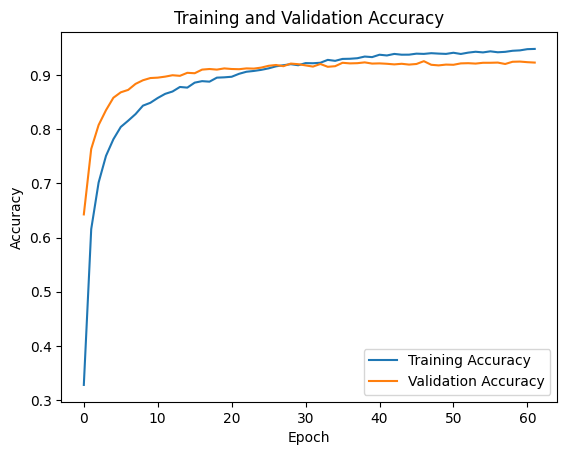

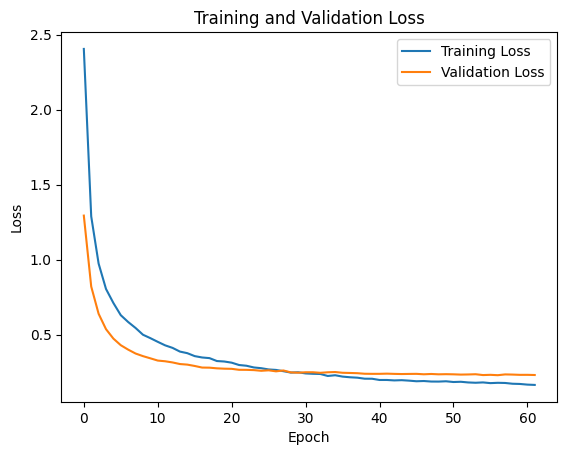

In [14]:
plt.plot(history_mobile.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_mobile.history['loss'], label='Training Loss')
plt.plot(history_mobile.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 957ms/step


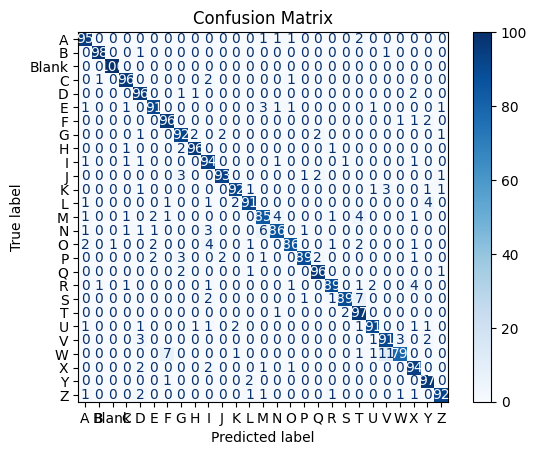

In [15]:
nb_samples= val_gen.samples
y_pred_net = model_mobile.predict(val_gen, steps=int(np.ceil(nb_samples/val_gen.batch_size)))
y_pred_classes = np.argmax(y_pred_net, axis=1)
y_true = val_gen.classes
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(val_gen.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Export Model

- Export Model to Save Model

In [16]:
# model.export('../save_model/')
model_mobile.export('../save_model/')

INFO:tensorflow:Assets written to: ../save_model/assets


INFO:tensorflow:Assets written to: ../save_model/assets


Saved artifact at '../save_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_475')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  2196344503488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345744096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345741456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345740752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345745152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345749024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345734944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345736352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345743568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345733536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196345735120: TensorSpec(shape

- Export to tensorflowlite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('../save_model/')
# model = tf.keras.models.load_model('../best_model/model.h5')
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('../tflite_model/model_signlang.tflite','wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpf575iwrr\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpf575iwrr\assets


Saved artifact at 'C:\Users\acer\AppData\Local\Temp\tmpf575iwrr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  1977114795120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114266080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114268192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114801984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114263792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114268016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114271360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114273472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114269776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977114271184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977